In [1]:
import numpy as np
import matplotlib.pyplot as plt
from params import * # all params stored in params.py
from cfl.experiment import Experiment

In [2]:
# constants
data_series = 'dataset1'

In [3]:
# load data
X = np.load(os.path.join(DATA_PATH, data_series, 'X.npy'))
Y = np.load(os.path.join(DATA_PATH, data_series, 'Y.npy'))
print(X.shape)
print(Y.shape)

(10000, 5)
(10000, 3)


In [4]:
# check if any columns have nans (CFL cannot handle missing entries!)
print(np.isnan(X).any(axis=0))
print(np.isnan(Y).any(axis=0))
# looks like we have complete data - we're good to go!

[False False False False False]
[False False False]


In [5]:
# Before training, it is good practice to either z-score your data or scale it 
# to a 0-1 range for two reasons: 1) neural network training is more efficient
# with lower input value ranges, and 2) if features in the data are measuring
# distinct quantities (and are therefore measured on distinct ranges), we want
# to give all features an equal weight in the learning process. 

# z-score each column
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

Y = Y - np.mean(Y, axis=0)
Y = Y / np.std(Y, axis=0)

In [6]:
# block_names indicates which CDE and clustering models to use
block_names = ['CondDensityEstimator', 'CauseClusterer', 'EffectClusterer']

# block_params is aligned to block_names (these are stored in params.py)
block_params = [CDE_PARAMS, CCLUSTER_PARAMS, ECLUSTER_PARAMS]

# Create a new CFL experiment with specified parameters
my_exp = Experiment(X_train=X, Y_train=Y, data_info=DATA_INFO, 
                    block_names=block_names, block_params=block_params, 
                    results_path=RESULTS_PATH)

All results from this run will be saved to /Users/imanwahle/Desktop/cfl_demo_repo/results/experiment0003
weights_path not specified in input, defaulting to None
optuna_callback not specified in input, defaulting to None
optuna_trial not specified in input, defaulting to None
early_stopping not specified in input, defaulting to False


2022-02-01 15:46:19.284313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#################### Beginning CFL Experiment training. ####################
Beginning CondDensityEstimator training...
No GPU device detected.
Epoch 1/80
235/235 [==============================] - 3s 8ms/step - loss: 1.1869 - val_loss: 0.9997
Epoch 2/80
235/235 [==============================] - 2s 8ms/step - loss: 0.8310 - val_loss: 0.6967
Epoch 3/80
235/235 [==============================] - 1s 4ms/step - loss: 0.5720 - val_loss: 0.4705
Epoch 4/80
235/235 [==============================] - 1s 4ms/step - loss: 0.3773 - val_loss: 0.3007
Epoch 5/80
235/235 [==============================] - 1s 3ms/step - loss: 0.2351 - val_loss: 0.1813
Epoch 6/80
235/235 [==============================] - 1s 4ms/step - loss: 0.1386 - val_loss: 0.1044
Epoch 7/80
235/235 [==============================] - 1s 3ms/step - loss: 0.0800 - val_loss: 0.0610
Epoch 8/80
235/235 [==============================] - 1s 3ms/step - loss: 0.0487 - val_loss: 0.0394
Epoch 9/80
235/235 [==============================] - 1s

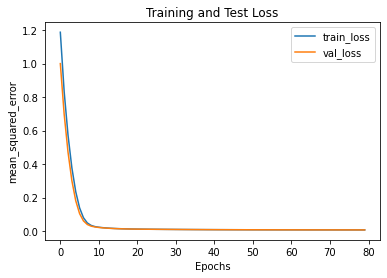

Loading parameters from  tmp_checkpoints01022022154619/best_weights
Saving parameters to  /Users/imanwahle/Desktop/cfl_demo_repo/results/experiment0003/trained_blocks/CondDensityEstimator
CondDensityEstimator training complete.
Beginning CauseClusterer training...
CauseClusterer training complete.
Beginning EffectClusterer training...


100%|██████████| 10000/10000 [00:01<00:00, 8766.17it/s]


EffectClusterer training complete.
Experiment training complete.


In [7]:
train_results = my_exp.train()
# note: if `tb_path` is specified in CDE_PARAMS, you can watch training 
# performance in real-time using tensorboard: `tensorboard --logdir logs`

In [8]:
xlbls = train_results['CauseClusterer']['x_lbls']
ylbls = train_results['EffectClusterer']['y_lbls']
uxlbls = np.unique(xlbls)
uylbls = np.unique(ylbls)

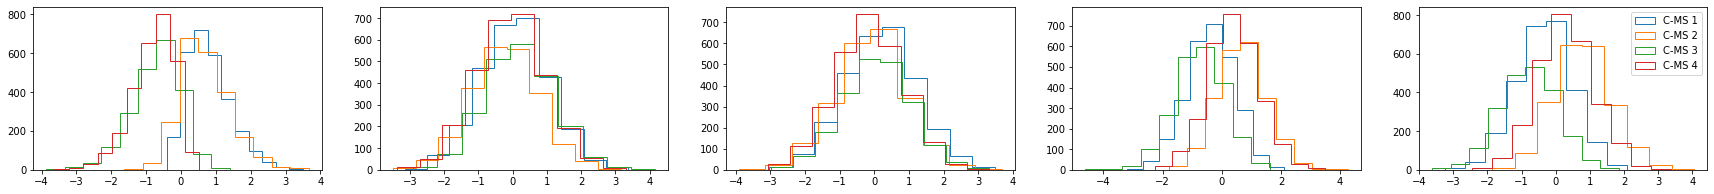

In [9]:
fig,axs = plt.subplots(1,5,figsize=(30,3))
for i,ax in enumerate(axs.ravel()):
    for ui,ulbl in enumerate(uxlbls):
        ax.hist(X[xlbls==ulbl,i],histtype='step')
plt.legend([f'C-MS {i+1}' for i in uxlbls])
plt.show()    

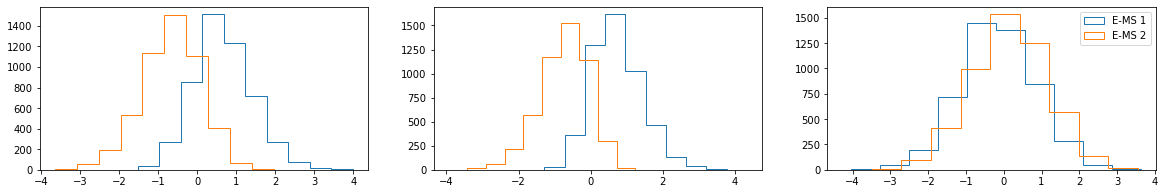

In [10]:
fig,axs = plt.subplots(1,3,figsize=(20,3))
for i,ax in enumerate(axs.ravel()):
    for ui,ulbl in enumerate(uylbls):
        ax.hist(Y[ylbls==ulbl,i],histtype='step')
plt.legend([f'E-MS {i+1}' for i in uylbls])
plt.show()    